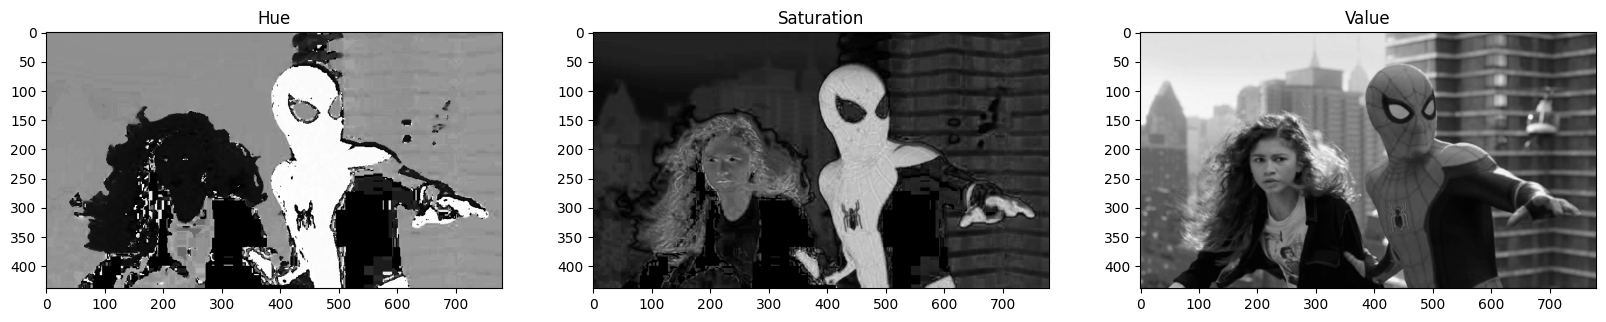

True

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image0 = cv2.imread('(4).jpg')  
# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image0, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_image)


#display 3 images in a row
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(h, cmap='gray')
plt.title('Hue')
plt.subplot(132)
plt.imshow(s, cmap='gray')
plt.title('Saturation')
plt.subplot(133)
plt.imshow(v, cmap='gray')
plt.title('Value')
plt.show()
#save it into folder Q4
cv2.imwrite('Q4/hue.jpg', h)
cv2.imwrite('Q4/saturation.jpg', s)
cv2.imwrite('Q4/value.jpg', v)


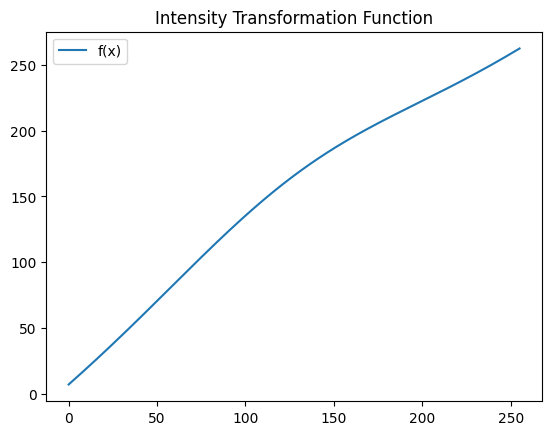

True

In [38]:
#apply intensity transformation to saturation plane
s = cv2.imread('Q4/saturation.jpg', 0)

#function f=min(x+(a/128)*exp(x-128)**2/2*sigma**2,255)
a = 0.3
sigma=70
#function to apply intensity transformation for each element in s, then compare the minimum value with 255
def min(x):
    return np.minimum(x + (a*128) * np.exp((-(x - 128)**2 )/ (2 * sigma**2)), 255).astype(np.uint8)
    
s = np.minimum(min(s), 255).astype(np.uint8)
#display intensity transformation function
x = np.arange(0, 256)

plt.plot(x + (a*128) * np.exp((-(x - 128)**2 )/ (2 * sigma**2))
, label='f(x)')
plt.title('Intensity Transformation Function')
plt.legend()
plt.show()


#display the image in window
cv2.namedWindow("Intensity Transformation",  cv2.WINDOW_AUTOSIZE)
cv2.imshow('Intensity Transformation', s)
cv2.waitKey(0)
cv2.destroyAllWindows()
#save it into folder Q4
cv2.imwrite('Q4/Intensity Transformation.jpg', s)

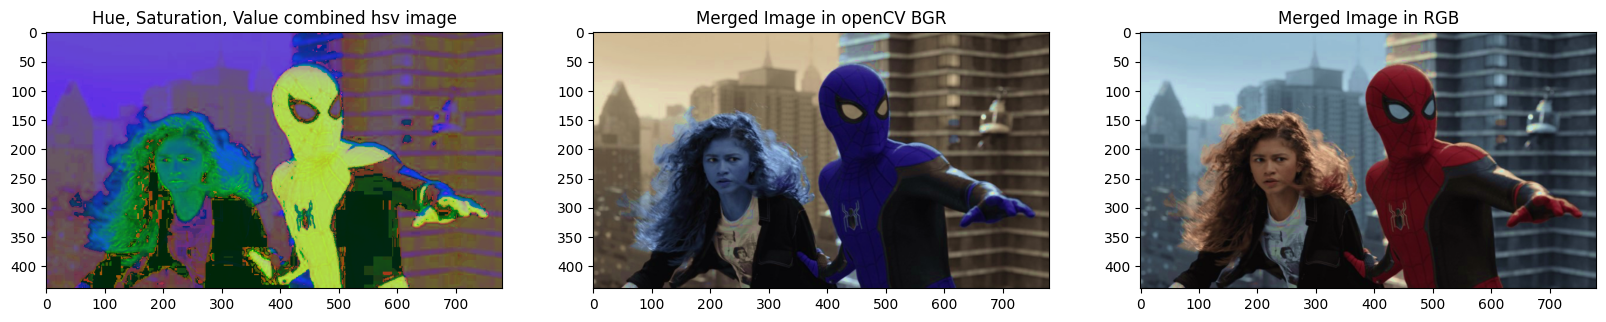

True

In [39]:
#recombine 3 plane h,f,v

hsv_image = cv2.merge([h, s, v])
#convert back to BGR
image1 = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
#display merged images in subplots
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(hsv_image, cmap='gray')
plt.title('Hue, Saturation, Value combined hsv image')
plt.subplot(132)
plt.imshow(image1, cmap='gray')
plt.title('Merged Image in openCV BGR')
plt.subplot(133)
plt.imshow(image2, cmap='gray')
plt.title('Merged Image in RGB')


plt.show()
cv2.imwrite('Q4/Recombined image.jpg', hsv_image)

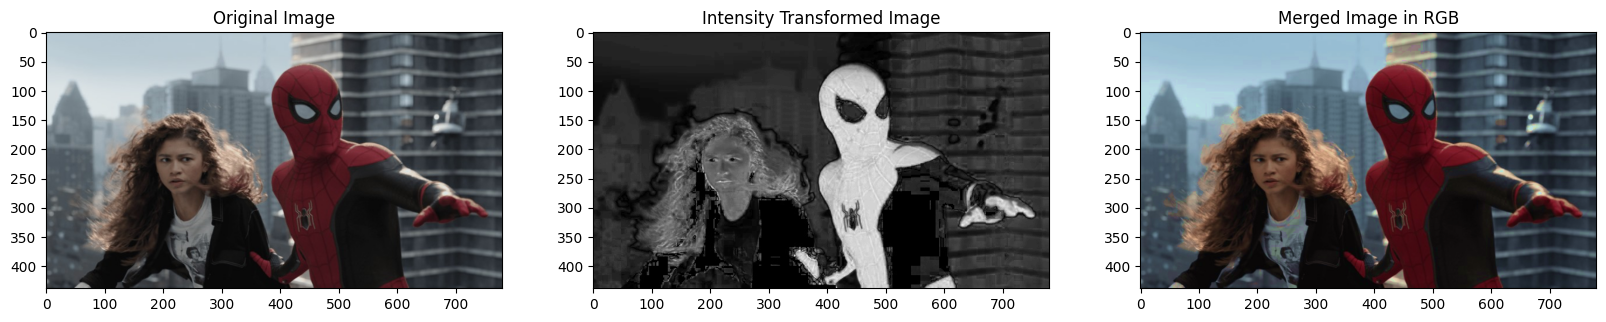

In [32]:


#display original, intensity transformed and image2 in subplots
plt.figure(figsize=(20, 20))
plt.subplot(131)
#conver to rgb
image0 = cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)
plt.imshow(image0)
plt.title('Original Image')
plt.subplot(132)
plt.imshow(s, cmap='gray')
plt.title('Intensity Transformed Image')
plt.subplot(133)
plt.imshow(image2, cmap='gray')
plt.title('Merged Image in RGB')
plt.show()




In [35]:
def vibrance_increase(x,a,sigma):
    fx = np.minimum ((x + (a*128*np.exp(-1*np.power(x-128,2)/(2*sigma**2)))),255)
    return fx


t=np.array([vibrance_increase(p,a,sigma) for p in range(256)]).astype('uint8')



